In [ ]:
import pandas as pd

# reading the CSV file
df = pd.read_csv('/content/Egypt_Houses_Price - Egypt_Houses_Price.csv',encoding='latin')

# displaying the contents of the CSV file
print(df.head())

        Type    Price Bedrooms Bathrooms Area Furnished   Level Compound  \
0     Duplex  4000000        3         3  400        No       7  Unknown   
1  Apartment  4000000        3         3  160        No     10+  Unknown   
2  Apartment  2250000        3         2  165        No       1  Unknown   
3  Apartment  1900000        3         2  230        No      10  Unknown   
4  Apartment  5800000        2         3  160        No  Ground  Eastown   

  Payment_Option  Delivery_Date  Delivery_Term                    City  
0           Cash  Ready to move       Finished               Nasr City  
1           Cash  Ready to move       Finished             Camp Caesar  
2           Cash  Ready to move       Finished                   Smoha  
3           Cash  Ready to move       Finished               Nasr City  
4           Cash  Ready to move  Semi Finished  New Cairo - El Tagamoa  


In [ ]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000,3,2,240,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4,3,218,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3,4,308,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4,4,478,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
count,27361,27359,27158,27190,26890,27361,27361,27361,27361,27361,27361,27361
unique,11,4182,12,12,786,3,14,560,4,10,5,183
top,Apartment,3000000,3,2,120,No,Unknown,Unknown,Cash or Installment,Ready to move,Finished,New Cairo - El Tagamoa
freq,8506,311,11803,9186,663,16500,10439,11068,10842,12142,14375,6789


In [ ]:
df=df.fillna(0)

In [ ]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your DataFrame
df1 = df.copy()
df1 = df1.astype(str)

# Iterate over categorical columns and apply ordinal encoding
for col in df1.columns:
    if df1[col].dtype == 'object':
        oe = OrdinalEncoder()
        df1[col] = oe.fit_transform(df1[[col]])



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfx_pca = pca.fit(df1)

In [ ]:
dfx_trans = pca.transform(df1)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1
0,446.958018,125.050916
1,452.772092,-146.248799
2,-665.917303,-164.722552
3,-970.453480,-100.731886
4,1125.965062,-116.432170
5,-1015.917019,-94.176290
6,396.878056,11.387860
7,-1196.267906,-202.124439
8,-1309.665981,-140.051410
9,2094.867882,-127.943685


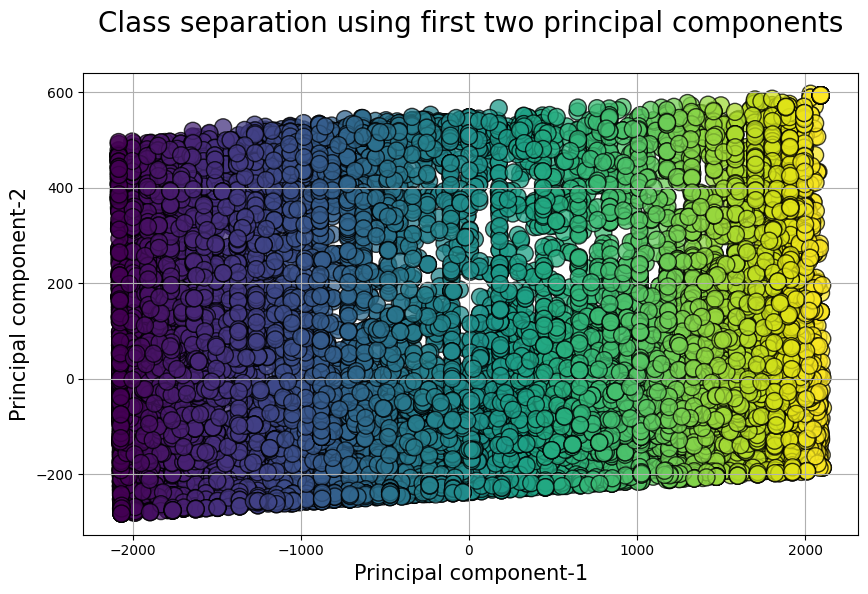

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df1['Price'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

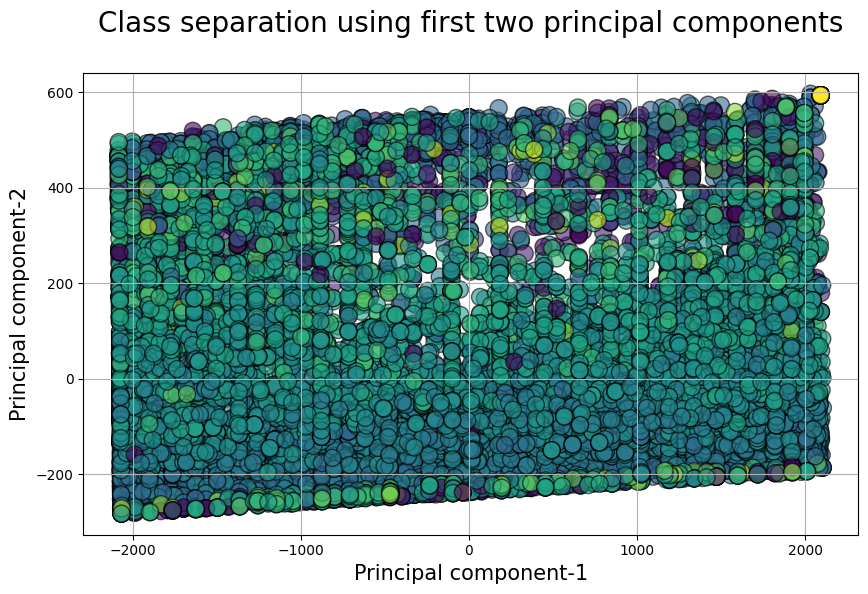

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df1['Bedrooms'],edgecolors='k',alpha=0.60,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()